<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Plotting on a Map with CartoPy</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="http://scitools.org.uk/images/cartopy.png" alt="CartoPy" style="height: 200px;"></div>

## Overview:

* **Teaching:** 20 minutes
* **Exercises:** 20 minutes

### Questions
1. How do we plot on a map in Python?
1. How do I specify a map projection?
1. How do I tell CartoPy how to reference my data?
1. How do I add map features to a CartoPy plot?

### Objectives
1. <a href="#basicfigure">Create a basic figure using CartoPy</a>
1. <a href="#mapfeatures">Add maps to the figure</a>
1. <a href="#plottingdata">Plot georeferenced data on the figure</a>

<a name="basicfigure"></a>
## 1. Basic CartoPy Plotting

- High level API for dealing with maps
- CartoPy allows you to plot data on a 2D map.
- Support many different map projections
- Support for shapefiles from the GIS world

In [1]:
# Set things up
%matplotlib inline

# Importing CartoPy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

The simplest plot we can make sets a projection with no parameters. The one below uses the Robinson projection:

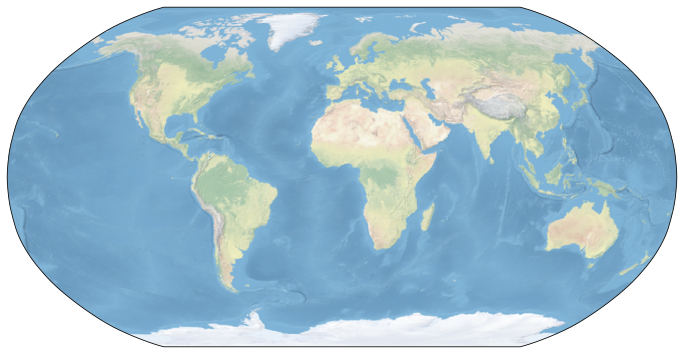

In [3]:
# Works with matplotlib's built-in transform support.
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# Sets the extent to cover the whole globe
ax.set_global()

# Adds standard background map
ax.stock_img()

We also have fine-tuned control over the globe used in the projection as well as lots of standard parameters, which depend on individual projections:

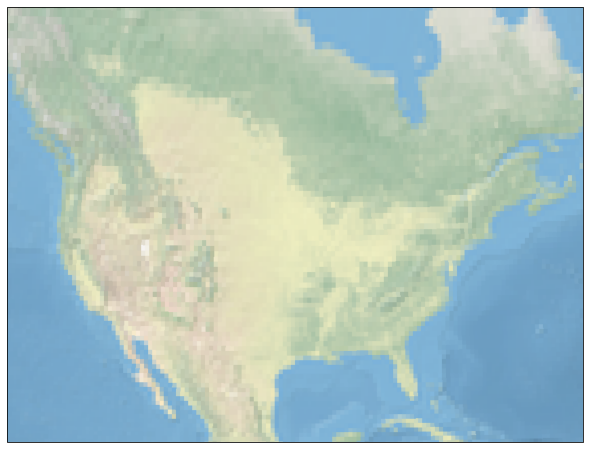

In [8]:
# Set up a globe with a specific radius
globe = ccrs.Globe(semimajor_axis=6371000.)

# Set up a Lambert Conformal projection
proj = ccrs.LambertConformal(standard_parallels=[5.0], globe=globe)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Sets the extent using a lon/lat box
ax.set_extent([-130, -60, 20, 55])

ax.stock_img()

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="mapfeatures"></a>
## 2. Adding maps to CartoPy

CartoPy provides a couple helper methods for adding maps to the plot:

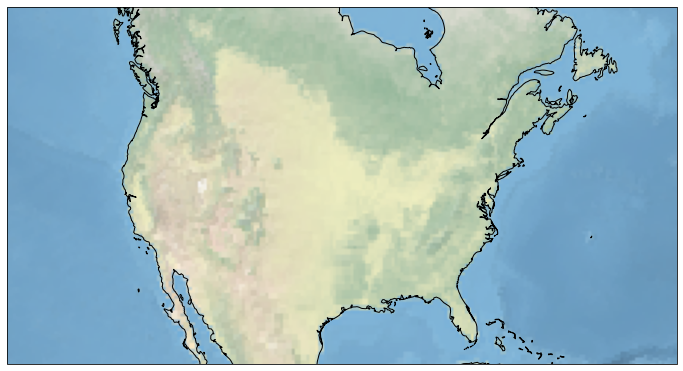

In [10]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

ax.stock_img()

ax.add_feature(cfeature.COASTLINE)

ax.set_extent([-130, -60, 20, 55])

Cartopy also has a lot of built-in support for a variety of map features:

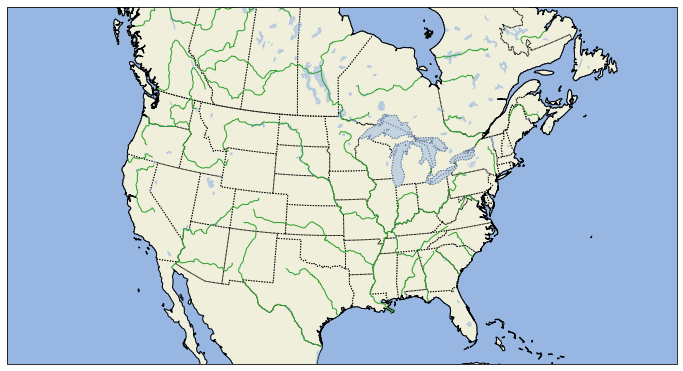

In [12]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

# Add variety of features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)

# Can also supply matplotlib kwargs
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS, edgecolor='tab:green')

ax.set_extent([-130, -60, 20, 55])

The map features are available at several different scales depending on how large the area you are covering is. The scales can be accessed using the `with_scale` method. Natural Earth features are available at 110m, 50m and 10m.

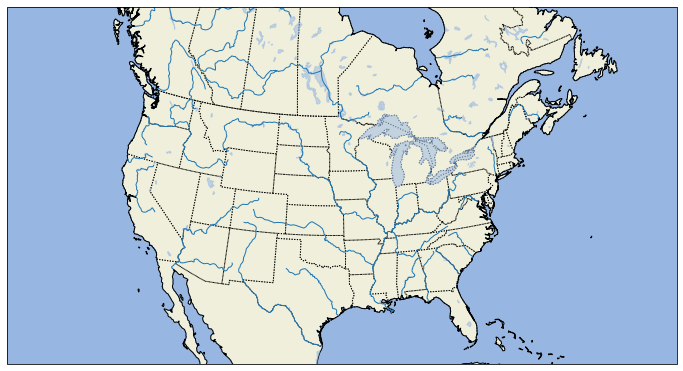

In [16]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

# Add variety of features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)

# Can also supply matplotlib kwargs
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.LAKES.with_scale('50m'), alpha=0.5)
ax.add_feature(cfeature.RIVERS.with_scale('50m'), edgecolor='tab:blue')

ax.set_extent([-130, -60, 20, 55])

You can also grab other features from the Natural Earth project: http://www.naturalearthdata.com/

## US Counties
MetPy has US Counties built in at the 20m, 5m, and 500k resolutions.

In [17]:
from metpy.plots import USCOUNTIES

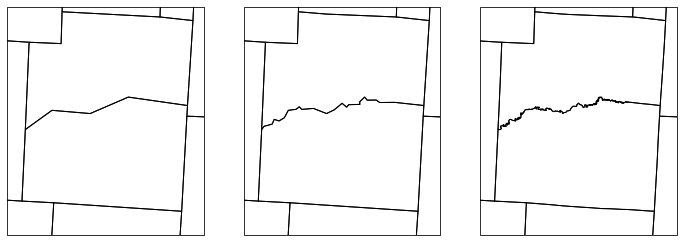

In [18]:
proj = ccrs.LambertConformal(central_longitude=-85.0, central_latitude=45.0)

fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(1, 3, 1, projection=proj)
ax2 = fig.add_subplot(1, 3, 2, projection=proj)
ax3 = fig.add_subplot(1, 3, 3, projection=proj)

for scale, axis in zip(['20m', '5m', '500k'], [ax1, ax2, ax3]):
    axis.set_extent([270.25, 270.9, 38.15, 38.75], ccrs.Geodetic())
    axis.add_feature(USCOUNTIES.with_scale(scale), edgecolor='black')

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="plottingdata"></a>
## 3. Plotting Data

CartoPy supports all of the matplotlib plotting options you would expect on a map. It handles transforming your data between different coordinate systems transparently, provided you provide the correct information. (More on this later...). To start, let's put a marker at -105, 40:

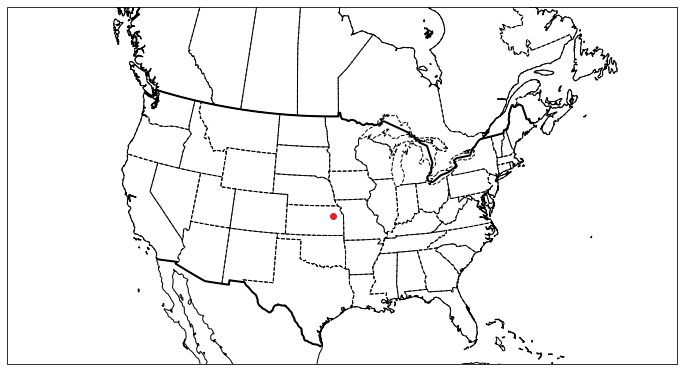

In [20]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linewidth=2)
ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='black')

ax.plot(-105, 40, marker='o', color='tab:red')

ax.set_extent([-130, -60, 20, 55])

So that did not succeed at putting a marker at -105 longitude, 40 latitude (Boulder, CO). Instead, what actually happened is that it put the marker at (-105, 40) in the map projection coordinate system; in this case that's a Lambert Conformal projection, and x,y are assumed in meters relative to the origin of that coordinate system. To get CartoPy to treat it as longitude/latitude, we need to tell it that's what we're doing. We do this through the use of the `transform` argument to all of the plotting functions.

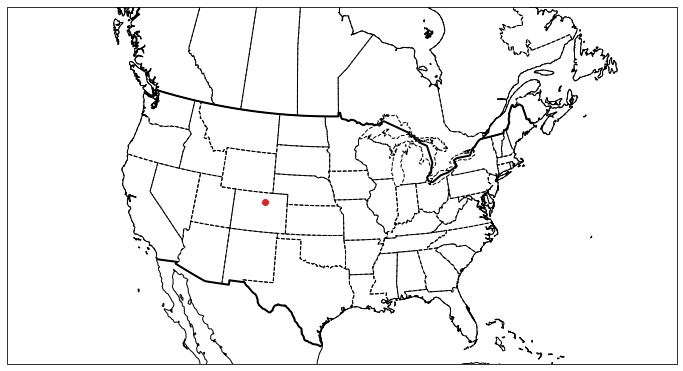

In [21]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linewidth=2)
ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='black')

data_projection = ccrs.PlateCarree()
ax.plot(-105, 40, marker='o', color='tab:red', transform=data_projection)

ax.set_extent([-130, -60, 20, 55])

This approach by CartoPy separates the data coordinate system from the coordinate system of the plot. It allows you to take data in any coordinate system (lon/lat, Lambert Conformal) and display it in any map you want. It also allows you to combine data from various coordinate systems seamlessly. This extends to all plot types, not just `plot`:

In [23]:
# Create some synthetic gridded wind data
import numpy as np
from metpy.calc import wind_speed
from metpy.units import units

# Note that all of these winds have u = 0 -> south wind
v = np.full((5, 5), 10, dtype=np.float64) + 10 * np.arange(5) * units.knots
u = np.zeros_like(v) * units.knots
speed = wind_speed(u, v)

# Create arrays of longitude and latitude
x = np.linspace(-120, -60, 5)
y = np.linspace(30, 55, 5)

# Plot as normal
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot wind barbs--CartoPy handles reprojecting the vectors properly for the
# coordinate system
ax.barbs(x, y, u.m, v.m, transform=ccrs.PlateCarree(), color='tab:blue')

ax.set_extent([-130, -60, 20, 55])

DimensionalityError: Cannot convert from 'dimensionless' to 'knot'

### Exercise
* Create a map, on a Mercator Projection, which at least has coastlines and country and state borders. Bonus points for putting on colored land and oceans, or other map features.
* Plot our location correctly on the map.
* Set the bounds of the map to zoom in mostly over our state/region.

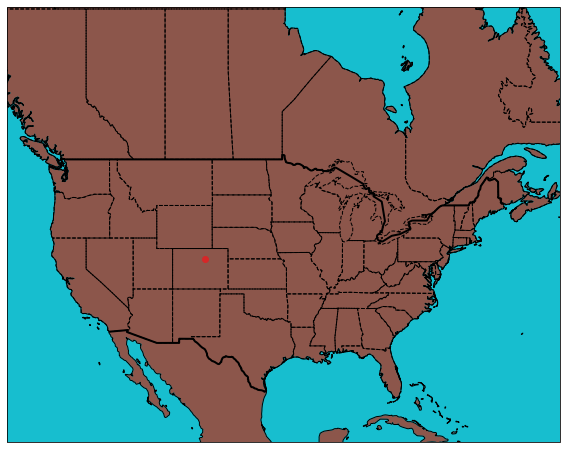

In [26]:
# YOUR CODE GOES HERE
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='tab:brown')
ax.add_feature(cfeature.OCEAN, facecolor='tab:cyan')
ax.add_feature(cfeature.BORDERS, linewidth=2)
ax.add_feature(cfeature.STATES, linestyle='--', edgecolor='black')

ax.plot(-105.0, 40.0, marker='o', color='tab:red', transform=ccrs.PlateCarree())

ax.set_extent([-130, -60, 20, 55])

#### Solution

In [ ]:
# %load solutions/map.py


<a href="#top">Top</a>
<hr style="height:2px;">